----- HEAD -----
   player_id               name  nationality  position  overall  age  hits  \
0     158023       Lionel Messi    Argentina  ST|CF|RW       94   33   299   
1      20801  Cristiano Ronaldo     Portugal     ST|LW       93   35   276   
2     190871          Neymar Jr       Brazil    CAM|LW       92   28   186   
3     203376    Virgil van Dijk  Netherlands        CB       91   29   127   
4     200389          Jan Oblak     Slovenia        GK       91   27    47   

   potential                  team  
0         94         FC Barcelona   
1         93             Juventus   
2         92  Paris Saint-Germain   
3         92            Liverpool   
4         93      Atlético Madrid   

----- INFO -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    17981 non-null  int64 
 1   name         17981 non-null  object
 2

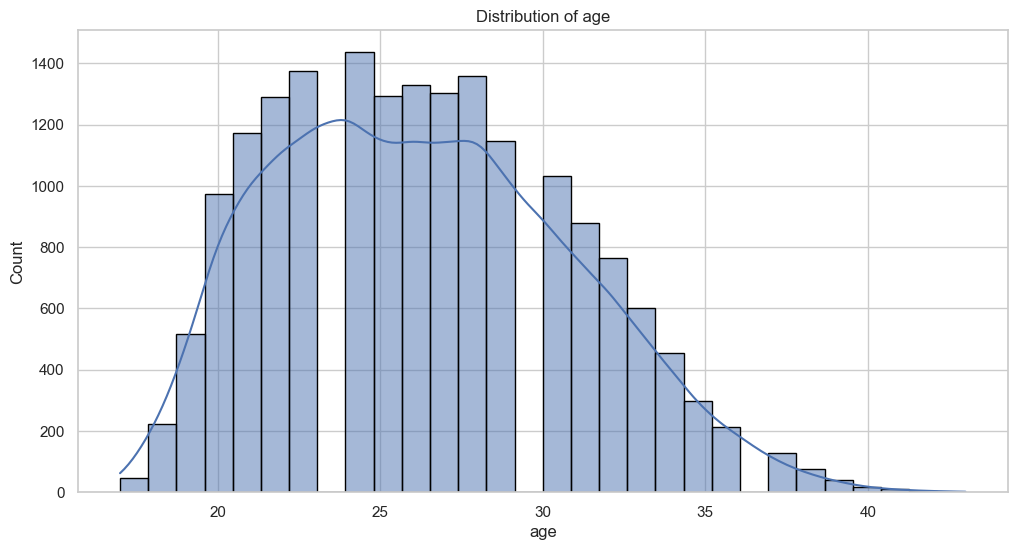

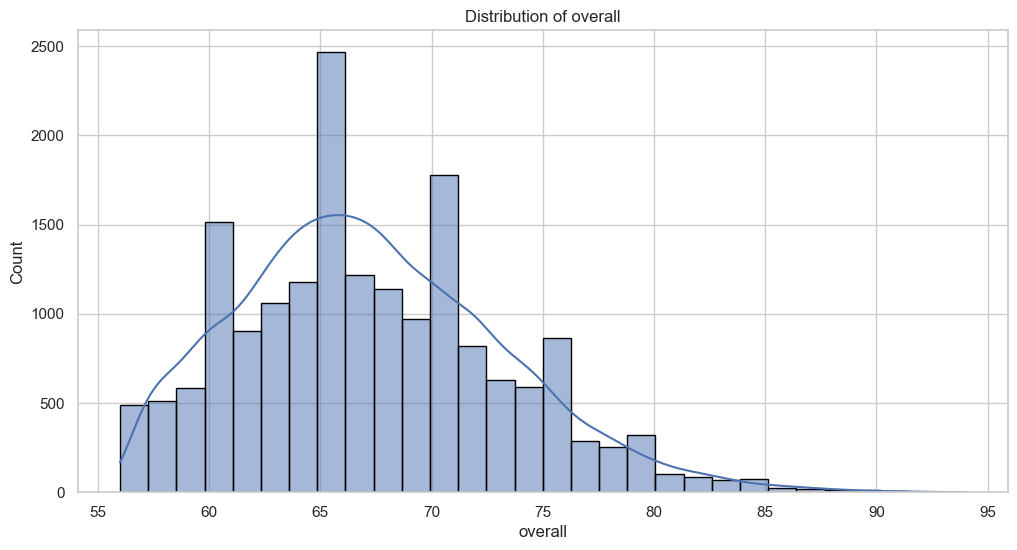

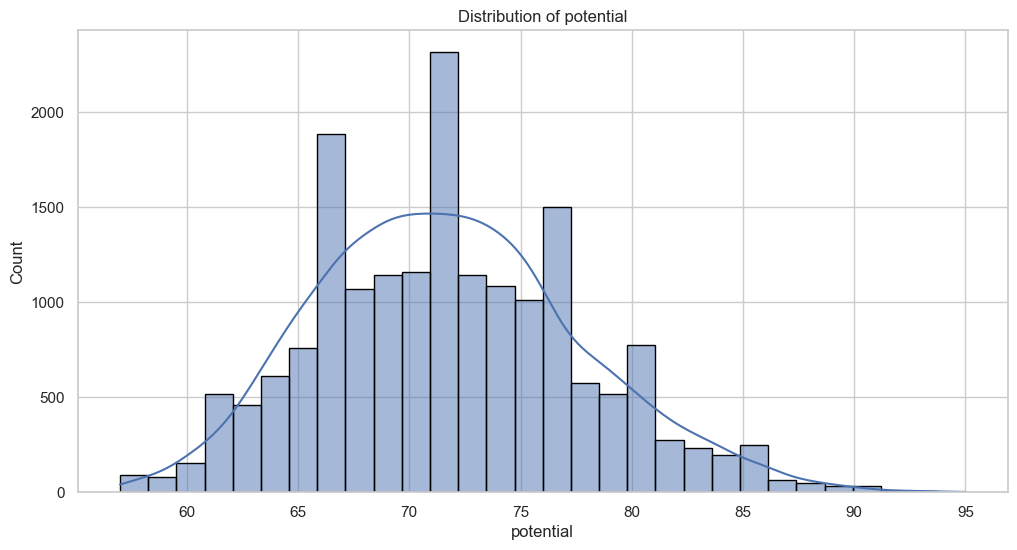

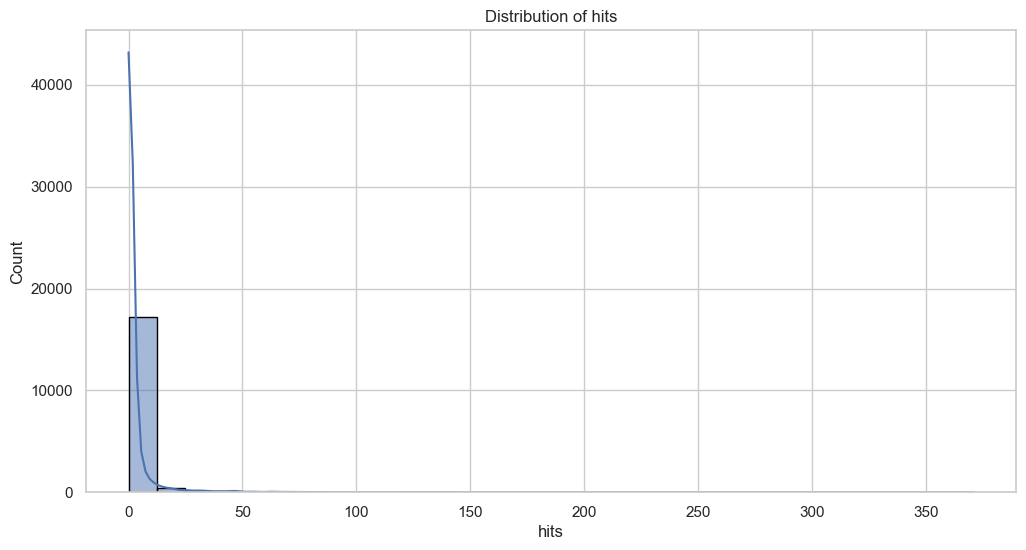

/var/folders/hh/v_lmvvzj73z2vgzm2wlztw2w0000gp/T/ipykernel_19458/2967195129.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette="viridis")


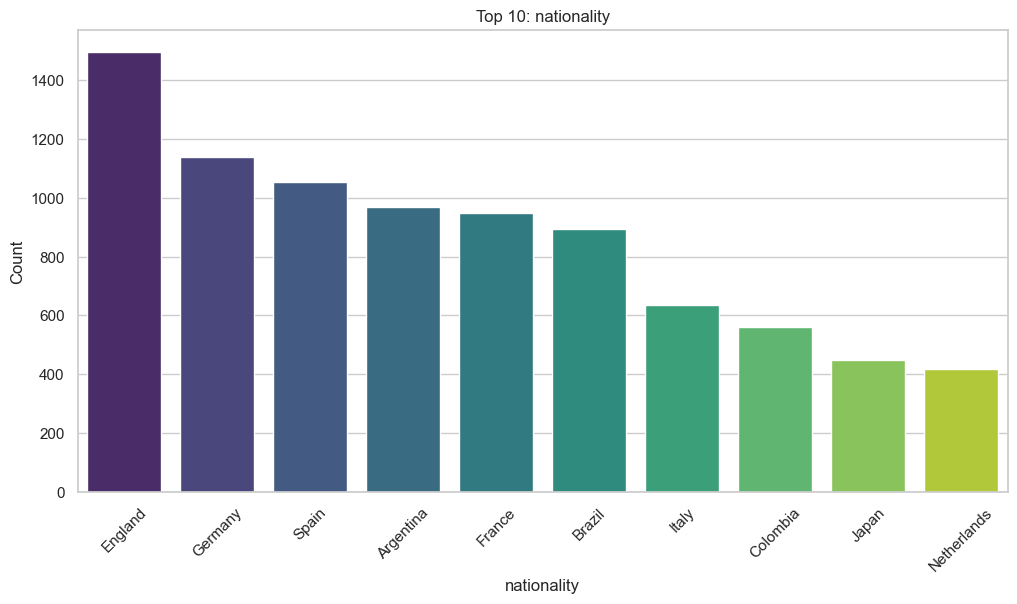

/var/folders/hh/v_lmvvzj73z2vgzm2wlztw2w0000gp/T/ipykernel_19458/2967195129.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette="viridis")


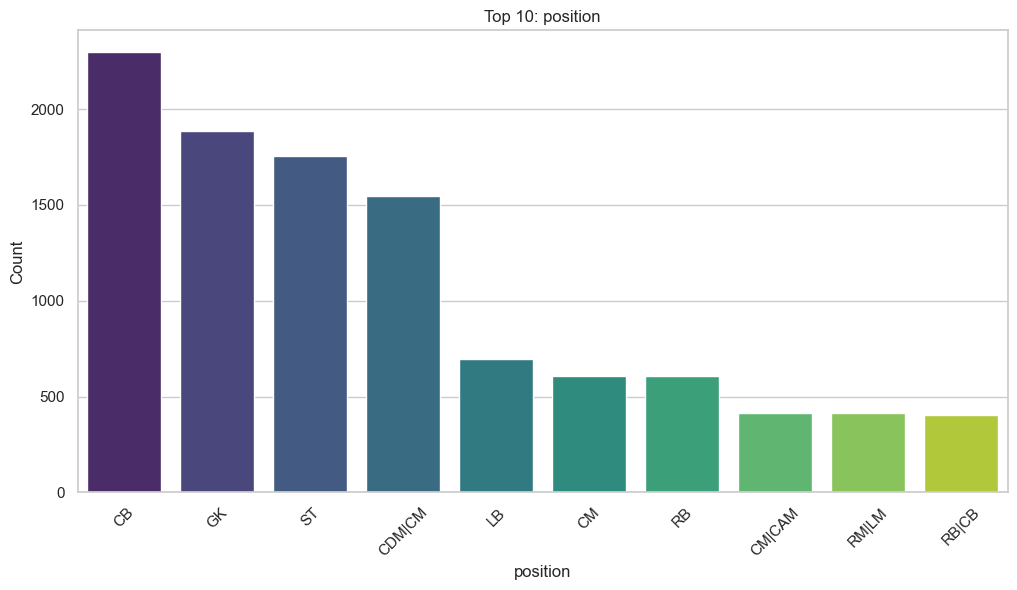

/var/folders/hh/v_lmvvzj73z2vgzm2wlztw2w0000gp/T/ipykernel_19458/2967195129.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette="viridis")


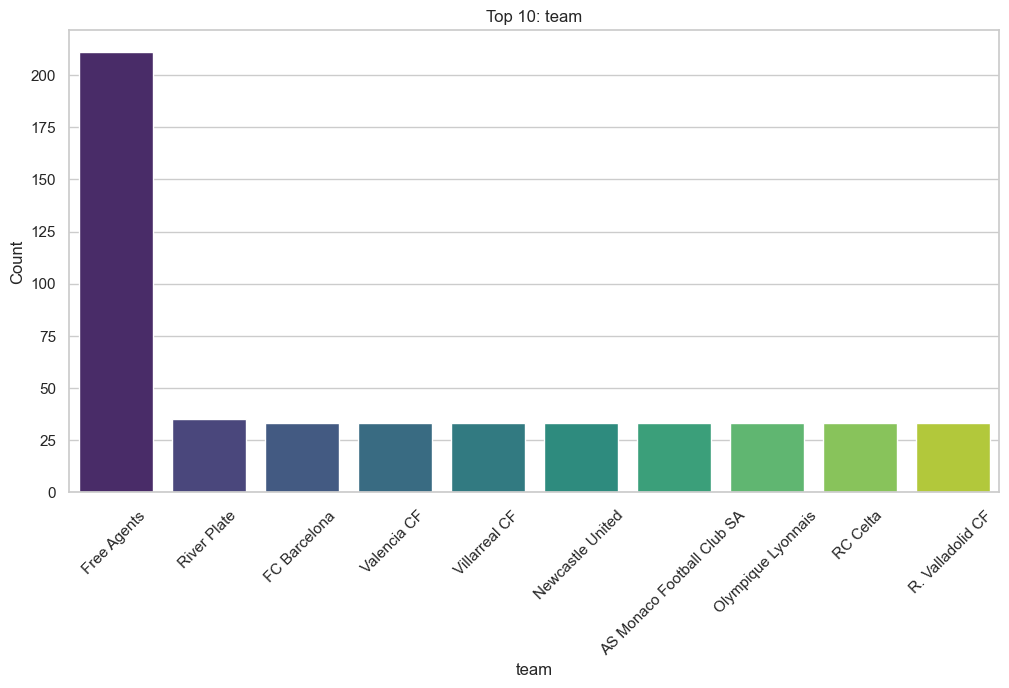

/var/folders/hh/v_lmvvzj73z2vgzm2wlztw2w0000gp/T/ipykernel_19458/2967195129.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="variable", y="value", data=df_melted, palette="Set2")


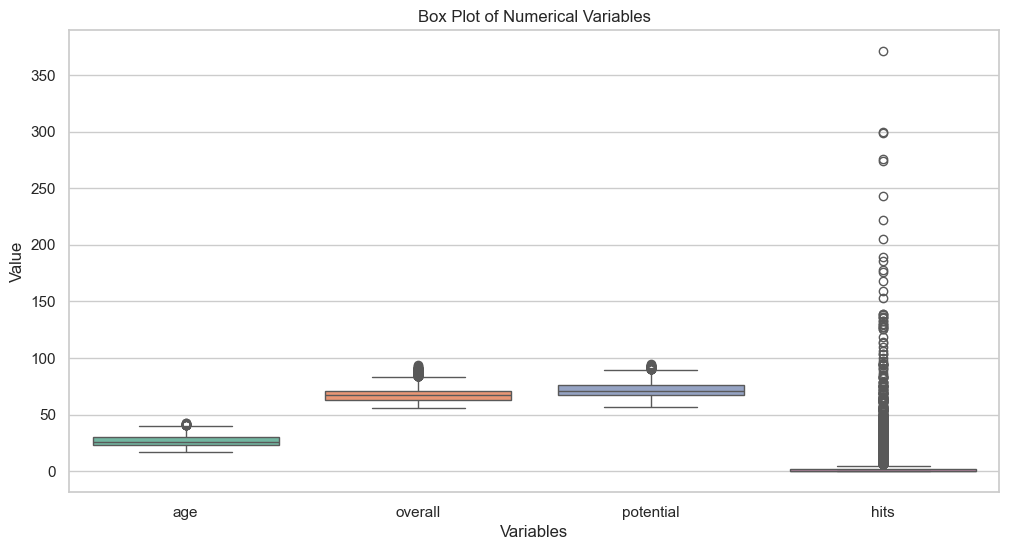

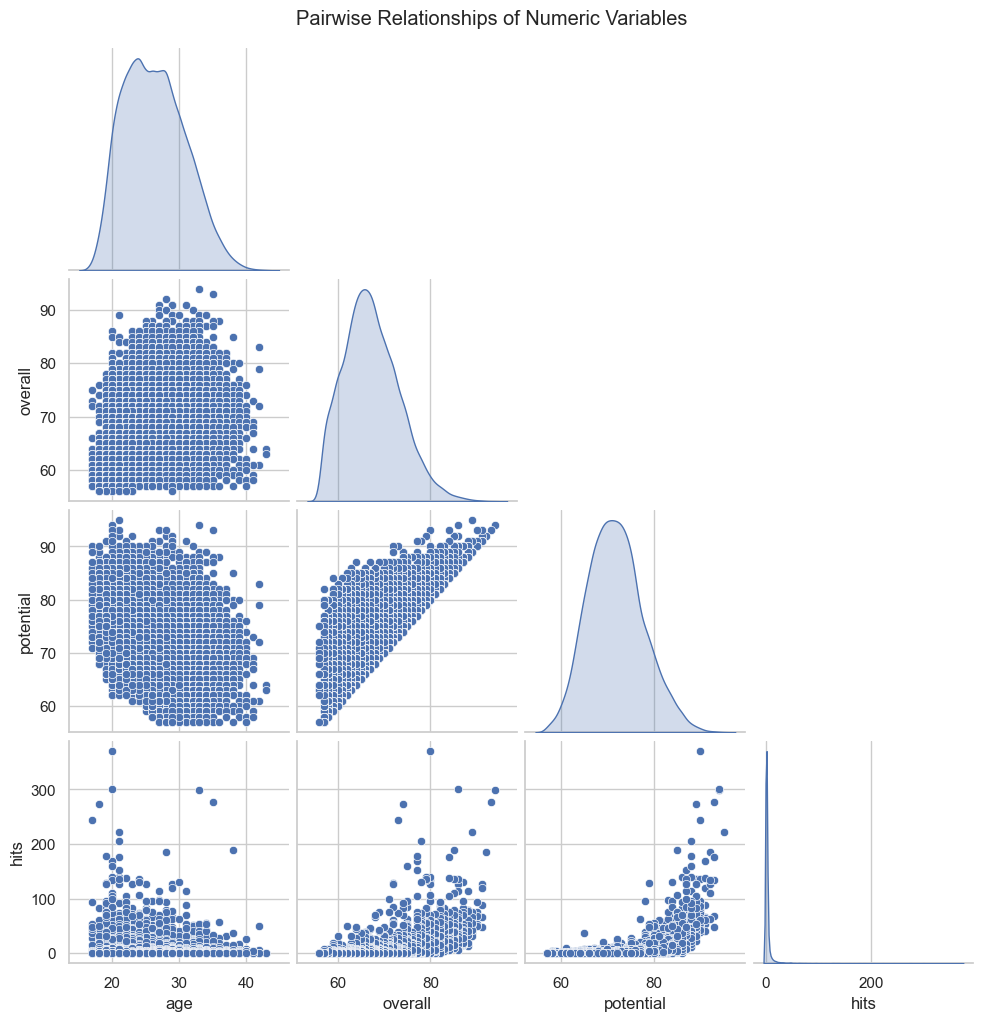

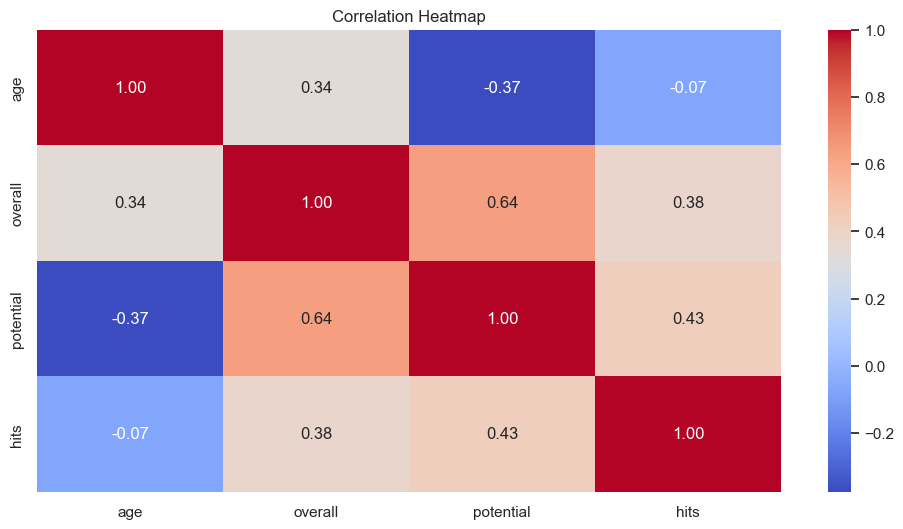

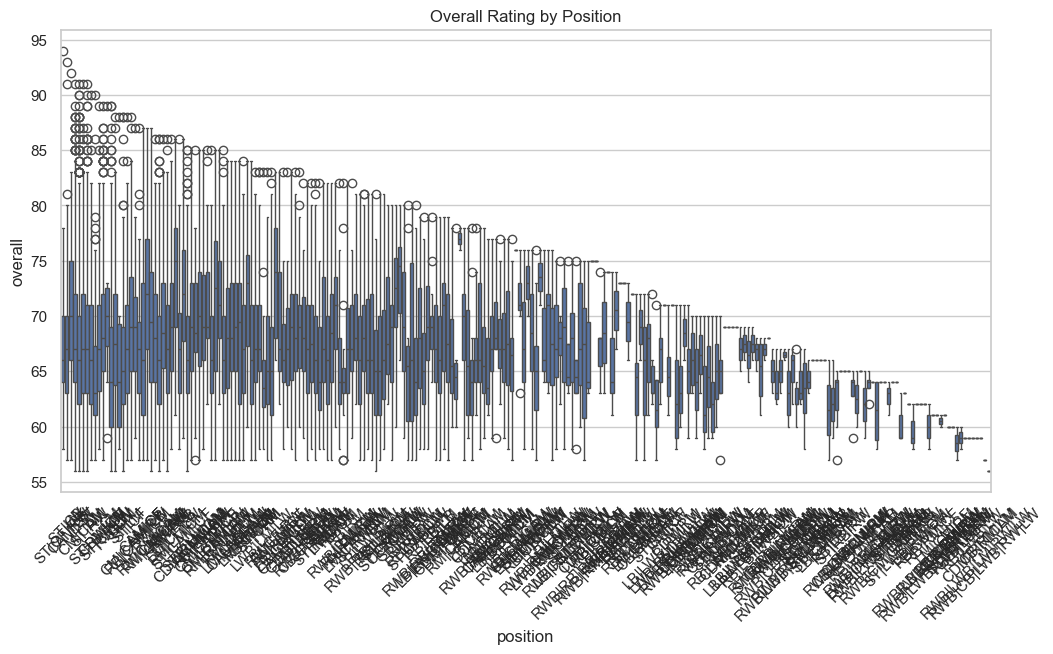

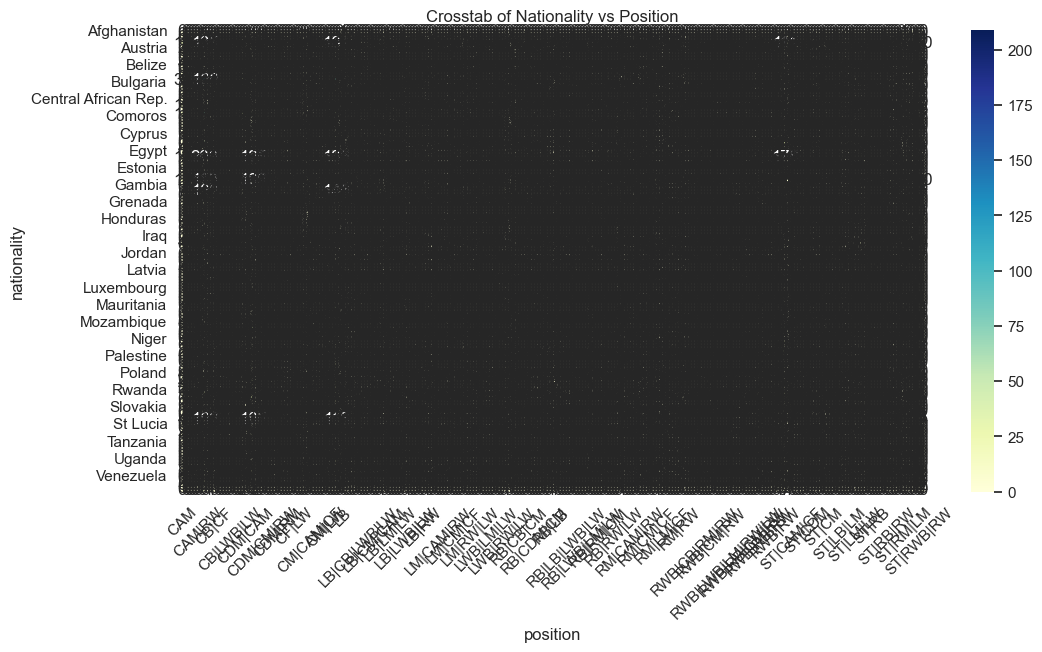

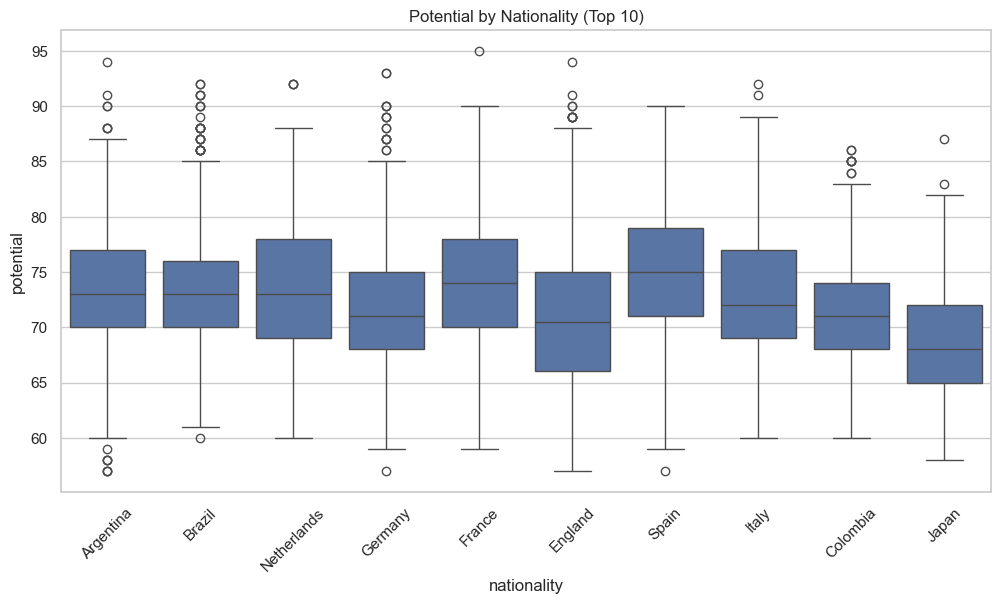


EDA Completed!


In [ ]:
# -------------------------------------------------------------------
# 1. IMPORT LIBRARIES & LOAD DATA
# -------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (12, 6)
sns.set_theme(style="whitegrid")

# Read the CSV using the correct semicolon separator
df = pd.read_csv("./fifa21_complete.csv", sep=";")

# -------------------------------------------------------------------
# 2. PRELIMINARY EXPLORATION
# -------------------------------------------------------------------
print("----- HEAD -----")
print(df.head())

print("\n----- INFO -----")
print(df.info())

# This provides basic descriptive statistics (min, max, mean, std, quartiles)
print("\n----- DESCRIBE (Numerical Columns) -----")
print(df.describe())

# Check for missing values
print("\n----- MISSING VALUES -----")
print(df.isna().sum())
print("\n----- COLUMNS -----")
print(df.columns)


numeric_cols = ["age", "overall", "potential", "hits"]

for col in numeric_cols:
    plt.figure()
    sns.histplot(data=df, x=col, kde=True, bins=30, edgecolor="black")
    plt.title(f"Distribution of {col}")  # Reports distribution (can be used to note outliers)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# (B) Bar Charts for Categorical Variables

categorical_cols = ["name", "nationality", "position", "team"]

for col in categorical_cols:
    # Skip "name" since it has too many unique values to be meaningful
    if col == "name":
        continue
    top_10 = df[col].value_counts().nlargest(10)
    plt.figure()
    sns.barplot(x=top_10.index, y=top_10.values, palette="viridis")
    plt.title(f"Top 10: {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.show()


df_melted = df.melt(value_vars=numeric_cols)
plt.figure()
sns.boxplot(x="variable", y="value", data=df_melted, palette="Set2")
plt.title("Box Plot of Numerical Variables")
plt.xlabel("Variables")
plt.ylabel("Value")
plt.show()


sns.pairplot(df[numeric_cols], corner=True, diag_kind="kde")
plt.suptitle("Pairwise Relationships of Numeric Variables", y=1.02)
plt.show()

# (B) Correlation Heatmap for Numeric Variables
corr = df[numeric_cols].corr()
plt.figure()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# -------------------------------------------------------------------
# 6. CATEGORICAL vs. NUMERICAL RELATIONSHIPS
# -------------------------------------------------------------------

# Example: Box plot of 'overall' rating grouped by 'position', colored by the category.
plt.figure()
sns.boxplot(data=df, x="position", y="overall")
plt.title("Overall Rating by Position")
plt.xticks(rotation=45)
plt.show()


ct = pd.crosstab(df["nationality"], df["position"])
plt.figure()
sns.heatmap(ct, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Crosstab of Nationality vs Position")
plt.xticks(rotation=45)
plt.show()

# Example: Box plot of 'potential' grouped by 'nationality' (top 10 only)
top_10_nations = df["nationality"].value_counts().nlargest(10).index
df_top_nations = df[df["nationality"].isin(top_10_nations)]
plt.figure()
sns.boxplot(data=df_top_nations, x="nationality", y="potential")
plt.title("Potential by Nationality (Top 10)")
plt.xticks(rotation=45)
plt.show()

print("\nEDA Completed!")

